# Parameter Distributions Analysis

**Goal**: Explore the distribution of key architectural parameters across the model ecosystem.

**Key Questions**:
1. What hidden sizes are most common?
2. How deep are models (num_hidden_layers)?
3. What's the distribution of vocabulary sizes?
4. How have context lengths evolved?
5. Are there parameter correlations we can observe?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

In [6]:
df = pd.read_csv('data/model_configs_expanded.csv', low_memory=False)
print(f"Total models: {len(df):,}")

Total models: 14,557


## 1. Hidden Size Distribution

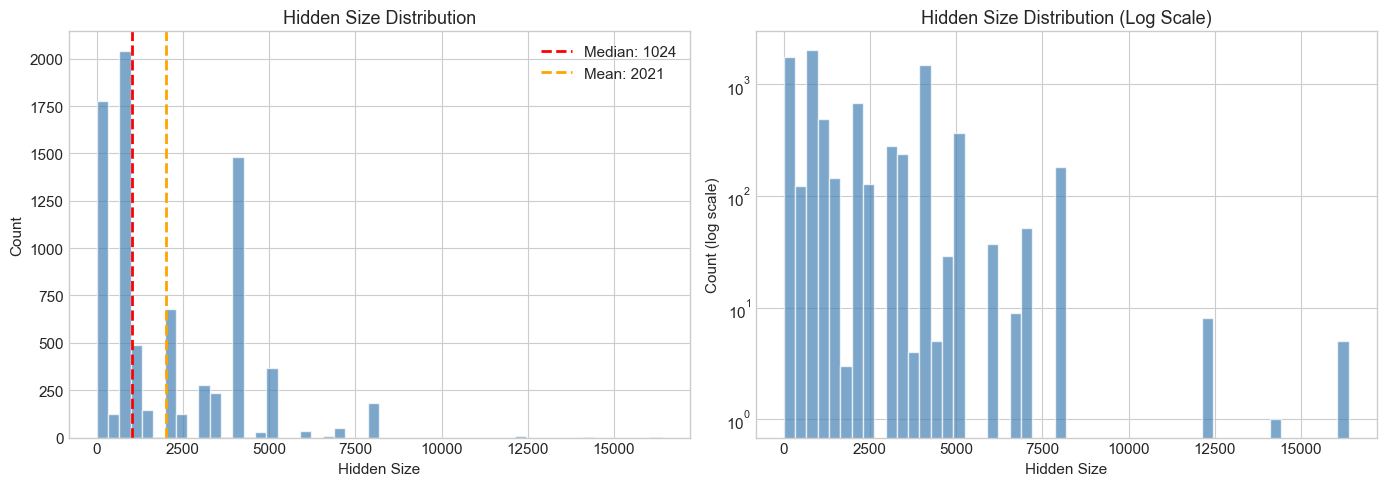


Most common hidden sizes:
config_hidden_size
768.0     1928
4096.0    1483
2048.0     679
1024.0     444
32.0       380
28.0       372
5120.0     368
3072.0     258
12.0       239
3584.0     237
Name: count, dtype: int64


In [7]:
hidden_sizes = df['config_hidden_size'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(hidden_sizes, bins=50, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(hidden_sizes.median(), color='red', linestyle='--', linewidth=2, label=f'Median: {hidden_sizes.median():.0f}')
axes[0].axvline(hidden_sizes.mean(), color='orange', linestyle='--', linewidth=2, label=f'Mean: {hidden_sizes.mean():.0f}')
axes[0].set_xlabel('Hidden Size')
axes[0].set_ylabel('Count')
axes[0].set_title('Hidden Size Distribution', fontsize=13)
axes[0].legend()

# Log scale histogram to see the range better
axes[1].hist(hidden_sizes, bins=50, color='steelblue', edgecolor='white', alpha=0.7)
axes[1].set_yscale('log')
axes[1].set_xlabel('Hidden Size')
axes[1].set_ylabel('Count (log scale)')
axes[1].set_title('Hidden Size Distribution (Log Scale)', fontsize=13)

plt.tight_layout()
plt.savefig('figures/hidden_size_dist.png', dpi=150, bbox_inches='tight')
plt.show()

# Common hidden sizes
print("\nMost common hidden sizes:")
print(hidden_sizes.value_counts().head(10))

## 2. Number of Layers Distribution

ValueError: invalid literal for int() with base 10: '12.0'

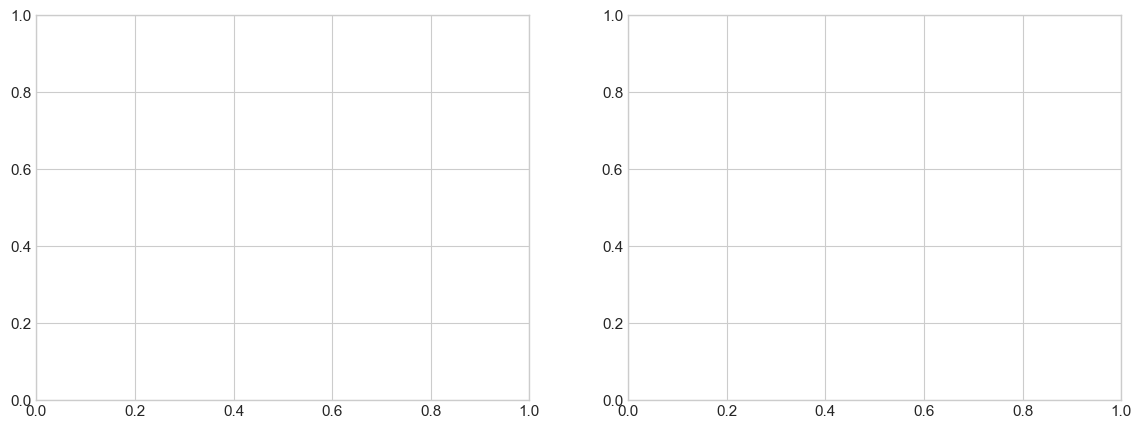

In [8]:
layers = pd.to_numeric(df['config_num_hidden_layers'], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot for discrete values
layer_counts = layers.value_counts().sort_index()
# Take top 30 most common
top_layers = layers.value_counts().head(30).sort_index()

# Convert index to int (handle float strings by converting to numeric first)
x_pos = pd.to_numeric(top_layers.index, errors='coerce').astype(int)
axes[0].bar(x_pos, top_layers.values, color='teal', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Number of Layers')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Hidden Layers Distribution', fontsize=13)

# Box plot
axes[1].boxplot(layers, vert=True)
axes[1].set_ylabel('Number of Layers')
axes[1].set_title('Layers Box Plot', fontsize=13)

plt.tight_layout()
plt.savefig('figures/num_layers_dist.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nLayer statistics:")
print(f"  Min: {layers.min():.0f}")
print(f"  Max: {layers.max():.0f}")
print(f"  Median: {layers.median():.0f}")
print(f"  Mean: {layers.mean():.1f}")
print("\nMost common layer counts:")
print(layers.value_counts().head(10))

## 3. Vocabulary Size Distribution

In [ ]:
vocab = df['config_vocab_size'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regular histogram
axes[0].hist(vocab, bins=50, color='purple', edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Vocabulary Size')
axes[0].set_ylabel('Count')
axes[0].set_title('Vocabulary Size Distribution', fontsize=13)

# Log-log to see the full range
axes[1].hist(vocab, bins=50, color='purple', edgecolor='white', alpha=0.7)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Vocabulary Size (log scale)')
axes[1].set_ylabel('Count (log scale)')
axes[1].set_title('Vocabulary Size Distribution (Log-Log)', fontsize=13)

plt.tight_layout()
plt.savefig('figures/vocab_size_dist.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVocabulary size statistics:")
print(f"  Min: {vocab.min():,.0f}")
print(f"  Max: {vocab.max():,.0f}")
print(f"  Median: {vocab.median():,.0f}")
print("\nMost common vocab sizes:")
print(vocab.value_counts().head(10))

## 4. Context Length (Max Position Embeddings) Distribution

In [ ]:
context = df['config_max_position_embeddings'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log scale histogram
axes[0].hist(context, bins=50, color='darkorange', edgecolor='white', alpha=0.7)
axes[0].set_xscale('log')
axes[0].set_xlabel('Max Position Embeddings (log scale)')
axes[0].set_ylabel('Count')
axes[0].set_title('Context Length Distribution', fontsize=13)

# Common context lengths bar chart
context_counts = context.value_counts().head(15).sort_index()
labels = [f"{int(v):,}" if v < 10000 else f"{int(v/1000)}K" for v in context_counts.index]
axes[1].bar(range(len(context_counts)), context_counts.values, color='darkorange', alpha=0.8)
axes[1].set_xticks(range(len(context_counts)))
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].set_xlabel('Context Length')
axes[1].set_ylabel('Count')
axes[1].set_title('Most Common Context Lengths', fontsize=13)

plt.tight_layout()
plt.savefig('figures/context_length_dist.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nContext length statistics:")
print(f"  Min: {context.min():,.0f}")
print(f"  Max: {context.max():,.0f}")
print(f"  Median: {context.median():,.0f}")
print("\nMost common context lengths:")
print(context.value_counts().head(10))

## 5. Attention Heads Distribution

In [ ]:
heads = df['config_num_attention_heads'].dropna()
kv_heads = df['config_num_key_value_heads'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Attention heads
head_counts = heads.value_counts().sort_index().head(20)
axes[0].bar(head_counts.index.astype(int), head_counts.values, color='crimson', alpha=0.8)
axes[0].set_xlabel('Number of Attention Heads')
axes[0].set_ylabel('Count')
axes[0].set_title('Attention Heads Distribution', fontsize=13)

# KV heads (for GQA)
kv_counts = kv_heads.value_counts().sort_index().head(20)
axes[1].bar(kv_counts.index.astype(int), kv_counts.values, color='forestgreen', alpha=0.8)
axes[1].set_xlabel('Number of Key-Value Heads')
axes[1].set_ylabel('Count')
axes[1].set_title('KV Heads Distribution (GQA)', fontsize=13)

plt.tight_layout()
plt.savefig('figures/attention_heads_dist.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nMost common attention head counts:")
print(heads.value_counts().head(10))
print("\nMost common KV head counts (GQA):")
print(kv_heads.value_counts().head(10))

## 6. RoPE Theta Distribution

In [ ]:
rope_theta = df['config_rope_theta'].dropna()

fig, ax = plt.subplots(figsize=(12, 5))

# Log scale histogram
ax.hist(rope_theta, bins=50, color='navy', edgecolor='white', alpha=0.7)
ax.set_xscale('log')
ax.set_xlabel('RoPE Theta (log scale)')
ax.set_ylabel('Count')
ax.set_title('RoPE Theta Distribution', fontsize=13)

plt.tight_layout()
plt.savefig('figures/rope_theta_dist.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nMost common RoPE theta values:")
print(rope_theta.value_counts().head(10))

## 7. Parameter Correlations

In [ ]:
# Select numeric columns for correlation analysis
corr_cols = [
    'config_hidden_size', 'config_intermediate_size', 'config_num_hidden_layers',
    'config_num_attention_heads', 'config_num_key_value_heads', 'config_vocab_size',
    'config_max_position_embeddings', 'config_approx_params_billions'
]

df_corr = df[corr_cols].dropna()

# Rename columns for cleaner display
rename_map = {c: c.replace('config_', '').replace('_', ' ').title() for c in corr_cols}
df_corr_renamed = df_corr.rename(columns=rename_map)

# Calculate correlation matrix
corr_matrix = df_corr_renamed.corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r',
            center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'label': 'Correlation'})
ax.set_title('Parameter Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.savefig('figures/parameter_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Scaling Relationships

In [ ]:
# Hidden size vs Num Layers (classic depth vs width tradeoff)
df_scaling = df[['config_hidden_size', 'config_num_hidden_layers', 
                  'config_intermediate_size', 'config_approx_params_billions']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hidden size vs Layers
scatter = axes[0].scatter(df_scaling['config_num_hidden_layers'], 
                          df_scaling['config_hidden_size'],
                          c=np.log10(df_scaling['config_approx_params_billions'] + 0.001),
                          cmap='viridis', alpha=0.6, s=20)
axes[0].set_xlabel('Number of Layers')
axes[0].set_ylabel('Hidden Size')
axes[0].set_title('Depth vs Width (colored by log params)', fontsize=13)
plt.colorbar(scatter, ax=axes[0], label='Log10(Params B)')

# FFN expansion ratio
df_scaling['ffn_ratio'] = df_scaling['config_intermediate_size'] / df_scaling['config_hidden_size']
valid_ffn = df_scaling[df_scaling['ffn_ratio'].between(1, 10)]['ffn_ratio']

axes[1].hist(valid_ffn, bins=50, color='mediumpurple', edgecolor='white', alpha=0.7)
axes[1].axvline(valid_ffn.median(), color='red', linestyle='--', linewidth=2, 
                label=f'Median: {valid_ffn.median():.2f}')
axes[1].set_xlabel('FFN Expansion Ratio (intermediate_size / hidden_size)')
axes[1].set_ylabel('Count')
axes[1].set_title('FFN Expansion Ratio Distribution', fontsize=13)
axes[1].legend()

plt.tight_layout()
plt.savefig('figures/scaling_relationships.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFFN expansion ratio statistics:")
print(f"  Median: {valid_ffn.median():.2f}")
print(f"  Mean: {valid_ffn.mean():.2f}")
print(f"  Most common: {valid_ffn.round(1).value_counts().head(5).to_dict()}")

## 9. Head Dimension Analysis

In [ ]:
head_dim = df['config_head_dimension'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Head dimension distribution
dim_counts = head_dim.value_counts().sort_index().head(20)
axes[0].bar(dim_counts.index.astype(int), dim_counts.values, color='coral', alpha=0.8)
axes[0].set_xlabel('Head Dimension (hidden_size / num_heads)')
axes[0].set_ylabel('Count')
axes[0].set_title('Head Dimension Distribution', fontsize=13)

# GQA ratio distribution
gqa_ratio = df['config_gqa_ratio'].dropna()
gqa_counts = gqa_ratio.value_counts().sort_index().head(15)
axes[1].bar(range(len(gqa_counts)), gqa_counts.values, color='seagreen', alpha=0.8)
axes[1].set_xticks(range(len(gqa_counts)))
axes[1].set_xticklabels([f"{x:.1f}" for x in gqa_counts.index], rotation=45)
axes[1].set_xlabel('GQA Ratio (num_heads / num_kv_heads)')
axes[1].set_ylabel('Count')
axes[1].set_title('GQA Ratio Distribution', fontsize=13)

plt.tight_layout()
plt.savefig('figures/head_dim_gqa.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nMost common head dimensions:")
print(head_dim.value_counts().head(10))
print("\nMost common GQA ratios:")
print(gqa_ratio.value_counts().head(10))

## 10. Summary Dashboard

In [ ]:
# Create a summary dashboard with key distributions
fig = plt.figure(figsize=(16, 12))

# Hidden Size
ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(hidden_sizes, bins=30, color='steelblue', alpha=0.7)
ax1.set_xlabel('Hidden Size')
ax1.set_title('Hidden Size')

# Num Layers
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(layers, bins=30, color='teal', alpha=0.7)
ax2.set_xlabel('Num Layers')
ax2.set_title('Number of Layers')

# Vocab Size (log)
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(vocab, bins=30, color='purple', alpha=0.7)
ax3.set_xscale('log')
ax3.set_xlabel('Vocab Size (log)')
ax3.set_title('Vocabulary Size')

# Context Length (log)
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(context, bins=30, color='darkorange', alpha=0.7)
ax4.set_xscale('log')
ax4.set_xlabel('Context Length (log)')
ax4.set_title('Max Position Embeddings')

# Attention Heads
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(heads, bins=30, color='crimson', alpha=0.7)
ax5.set_xlabel('Num Attention Heads')
ax5.set_title('Attention Heads')

# Approx Params
params = df['config_approx_params_billions'].dropna()
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(params, bins=30, color='forestgreen', alpha=0.7)
ax6.set_xscale('log')
ax6.set_xlabel('Params (B, log)')
ax6.set_title('Approximate Parameters')

plt.suptitle('Model Configuration Parameter Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('figures/parameter_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()